In [1]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): l


Параметры пучков и спектры

In [4]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)

In [5]:
m = 80
target = R(Material(m), 0.01)

brems = [target.brem(beams_energy) for beams_energy in beams_energyes]
brems_e = [brem * en for brem in brems]

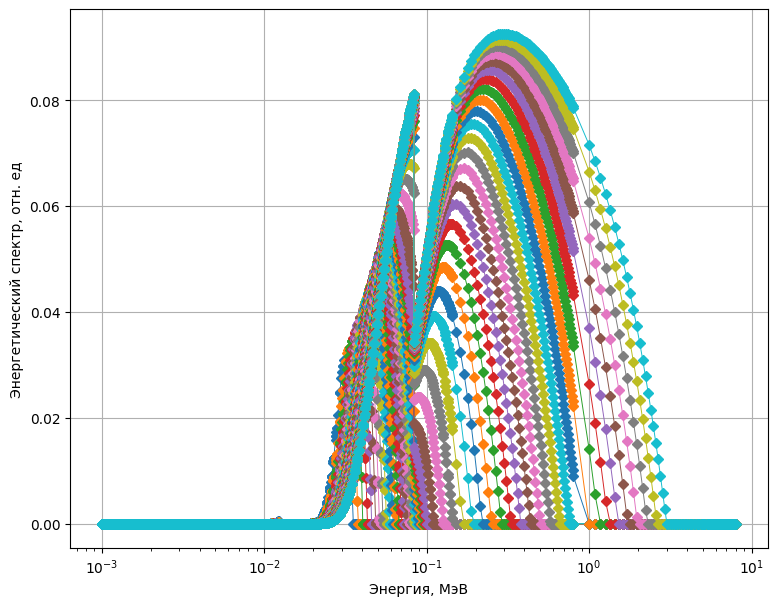

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))

for br in brems_e:
    ax.plot(en, br, ls='-', marker='D', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Номер первого канала и К-скачки

In [7]:
n = 11

In [8]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [9]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

Уровни пропускания в К-крае

In [10]:
linspace3 = np.linspace(0.001, 0.9, 101)
for i, val in enumerate(linspace3):
    linspace3[i] = round(val, 5)
    
edge_max_values = []
edge_max_values.extend(linspace3)

Спектральные характеристики чувствительности каналов

In [11]:
edge_thiknesses = [[Material(i).lt(j) for i in range(n, 101)] for j in edge_max_values]

In [12]:
edge_regions = [[R(Material(i+n), edge_thiknesses[j][i]) for i in range(0, len(edge_thiknesses[j]))] for j in range(len(edge_thiknesses))]
resp_edges = [[val.f() for val in edge_regions[j]] for j in range(len(edge_regions))]

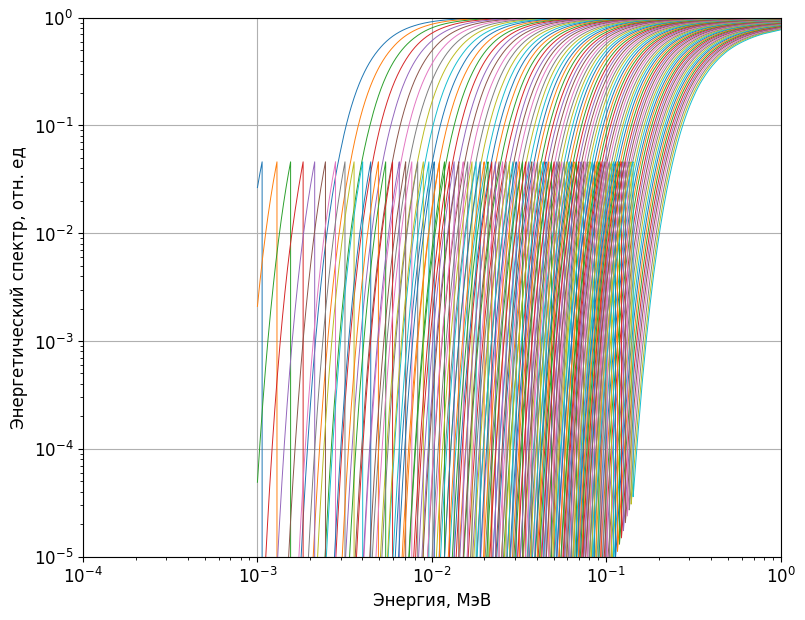

In [13]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_edges[5]:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Матрицы задач

In [14]:
from garipov_deconvolution import get_coeff_simpson

In [15]:
Matrixs = []

start_time = time.time()

for i in range(len(resp_edges)):
    print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
    matrix = []
    
    for response in resp_edges[i]:
        matrix.append(get_coeff_simpson(response, en, EDGE)[0])
    
    Matrixs.append(matrix)

(0), время: 0.00026 секунд
(1), время: 4.13101 секунд
(2), время: 8.79628 секунд
(3), время: 14.28003 секунд
(4), время: 17.09904 секунд
(5), время: 19.76973 секунд
(6), время: 22.43189 секунд
(7), время: 25.25246 секунд
(8), время: 27.913 секунд
(9), время: 30.5799 секунд
(10), время: 33.24799 секунд
(11), время: 35.91412 секунд
(12), время: 39.35565 секунд
(13), время: 45.26176 секунд
(14), время: 48.76401 секунд
(15), время: 52.53307 секунд
(16), время: 57.63235 секунд
(17), время: 63.61973 секунд
(18), время: 69.49089 секунд
(19), время: 74.87113 секунд
(20), время: 80.37121 секунд
(21), время: 83.59724 секунд
(22), время: 88.50404 секунд
(23), время: 94.27789 секунд
(24), время: 100.12034 секунд
(25), время: 104.57074 секунд
(26), время: 107.12247 секунд
(27), время: 109.69339 секунд
(28), время: 112.35587 секунд
(29), время: 116.00873 секунд
(30), время: 118.77563 секунд
(31), время: 121.43116 секунд
(32), время: 124.00132 секунд
(33), время: 126.54321 секунд
(34), время: 131.912

Сигналы измерительных каналов

In [16]:
new_en = get_coeff_simpson(resp_edges[0][0], en, EDGE)[1]

In [17]:
def signals_from_one_spectrum(spectrum):
    
    start_time = time.time()
    signals_simpson = []
    
    # для каждой матрицы
    for i, matrix in enumerate(Matrixs):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        
        # сигналы для каждой задачи
        signals = []
        
        # для каждой строки в матрице
        for row in matrix:
            # значение одного сигнала
            signal = sum(row * np.interp(new_en, en, spectrum))
            signals.append(signal)
            
        signals_simpson.append(signals)
        
    return signals_simpson

Сигналы для каждого спектра

In [18]:
spectrums_signals = []

for spectrum in brems_e:
    spectrums_signals.append(signals_from_one_spectrum(spectrum))

(0), время: 0.0 секунд
(1), время: 0.1223 секунд
(2), время: 0.25819 секунд
(3), время: 0.38665 секунд
(4), время: 0.50681 секунд
(5), время: 0.56491 секунд
(6), время: 0.62376 секунд
(7), время: 0.69931 секунд
(8), время: 0.80268 секунд
(9), время: 0.86537 секунд
(10), время: 0.93155 секунд
(11), время: 1.01687 секунд
(12), время: 1.07779 секунд
(13), время: 1.20924 секунд
(14), время: 1.34171 секунд
(15), время: 1.48027 секунд
(16), время: 1.60252 секунд
(17), время: 1.66063 секунд
(18), время: 1.71851 секунд
(19), время: 1.7941 секунд
(20), время: 1.91432 секунд
(21), время: 1.97316 секунд
(22), время: 2.053 секунд
(23), время: 2.18977 секунд
(24), время: 2.32316 секунд
(25), время: 2.45188 секунд
(26), время: 2.57845 секунд
(27), время: 2.69574 секунд
(28), время: 2.75485 секунд
(29), время: 2.81547 секунд
(30), время: 2.88478 секунд
(31), время: 3.01258 секунд
(32), время: 3.10053 секунд
(33), время: 3.15886 секунд
(34), время: 3.21949 секунд
(35), время: 3.28594 секунд
(36), врем

(94), время: 8.78991 секунд
(95), время: 8.84964 секунд
(96), время: 8.91383 секунд
(97), время: 9.0468 секунд
(98), время: 9.12477 секунд
(99), время: 9.18564 секунд
(100), время: 9.24694 секунд
(0), время: 1e-05 секунд
(1), время: 0.11846 секунд
(2), время: 0.23943 секунд
(3), время: 0.30963 секунд
(4), время: 0.36814 секунд
(5), время: 0.47287 секунд
(6), время: 0.60081 секунд
(7), время: 0.72684 секунд
(8), время: 0.80175 секунд
(9), время: 0.86054 секунд
(10), время: 0.95434 секунд
(11), время: 1.04397 секунд
(12), время: 1.10308 секунд
(13), время: 1.18909 секунд
(14), время: 1.31909 секунд
(15), время: 1.37835 секунд
(16), время: 1.44378 секунд
(17), время: 1.53334 секунд
(18), время: 1.59219 секунд
(19), время: 1.66299 секунд
(20), время: 1.74285 секунд
(21), время: 1.80191 секунд
(22), время: 1.9038 секунд
(23), время: 2.02406 секунд
(24), время: 2.08329 секунд
(25), время: 2.15777 секунд
(26), время: 2.2444 секунд
(27), время: 2.30194 секунд
(28), время: 2.40862 секунд
(29), 

(87), время: 8.27376 секунд
(88), время: 8.37733 секунд
(89), время: 8.45003 секунд
(90), время: 8.51285 секунд
(91), время: 8.59408 секунд
(92), время: 8.93753 секунд
(93), время: 9.00824 секунд
(94), время: 9.14112 секунд
(95), время: 9.21247 секунд
(96), время: 9.26981 секунд
(97), время: 9.35117 секунд
(98), время: 9.44666 секунд
(99), время: 9.50571 секунд
(100), время: 9.56752 секунд
(0), время: 1e-05 секунд
(1), время: 0.13345 секунд
(2), время: 0.26364 секунд
(3), время: 0.40352 секунд
(4), время: 0.53632 секунд
(5), время: 0.67149 секунд
(6), время: 0.74742 секунд
(7), время: 0.80607 секунд
(8), время: 0.8881 секунд
(9), время: 0.98403 секунд
(10), время: 1.0436 секунд
(11), время: 1.1038 секунд
(12), время: 1.24377 секунд
(13), время: 1.37411 секунд
(14), время: 1.45016 секунд
(15), время: 1.50942 секунд
(16), время: 1.58373 секунд
(17), время: 1.72399 секунд
(18), время: 1.85787 секунд
(19), время: 1.91648 секунд
(20), время: 2.03105 секунд
(21), время: 2.09843 секунд
(22), 

(80), время: 7.55592 секунд
(81), время: 7.63734 секунд
(82), время: 7.76929 секунд
(83), время: 7.83507 секунд
(84), время: 7.89442 секунд
(85), время: 8.01928 секунд
(86), время: 8.11425 секунд
(87), время: 8.17147 секунд
(88), время: 8.24087 секунд
(89), время: 8.36973 секунд
(90), время: 8.50664 секунд
(91), время: 8.61416 секунд
(92), время: 8.67318 секунд
(93), время: 8.76043 секунд
(94), время: 8.86434 секунд
(95), время: 8.92165 секунд
(96), время: 8.99268 секунд
(97), время: 9.12283 секунд
(98), время: 9.25466 секунд
(99), время: 9.3411 секунд
(100), время: 9.39985 секунд
(0), время: 1e-05 секунд
(1), время: 0.07931 секунд
(2), время: 0.2148 секунд
(3), время: 0.34222 секунд
(4), время: 0.44405 секунд
(5), время: 0.5023 секунд
(6), время: 0.59158 секунд
(7), время: 0.71951 секунд
(8), время: 0.84115 секунд
(9), время: 0.97016 секунд
(10), время: 1.03099 секунд
(11), время: 1.09146 секунд
(12), время: 1.16446 секунд
(13), время: 1.28532 секунд
(14), время: 1.40504 секунд
(15), 

(73), время: 6.99532 секунд
(74), время: 7.10518 секунд
(75), время: 7.23928 секунд
(76), время: 7.29996 секунд
(77), время: 7.36088 секунд
(78), время: 7.44517 секунд
(79), время: 7.56911 секунд
(80), время: 7.70134 секунд
(81), время: 7.76587 секунд
(82), время: 7.82598 секунд
(83), время: 7.89554 секунд
(84), время: 8.02514 секунд
(85), время: 8.14736 секунд
(86), время: 8.20497 секунд
(87), время: 8.26548 секунд
(88), время: 8.37199 секунд
(89), время: 8.48448 секунд
(90), время: 8.60205 секунд
(91), время: 8.66099 секунд
(92), время: 8.75355 секунд
(93), время: 8.88818 секунд
(94), время: 8.98184 секунд
(95), время: 9.04437 секунд
(96), время: 9.15515 секунд
(97), время: 9.27963 секунд
(98), время: 9.41309 секунд
(99), время: 9.5151 секунд
(100), время: 9.57326 секунд
(0), время: 0.0 секунд
(1), время: 0.08956 секунд
(2), время: 0.19251 секунд
(3), время: 0.25179 секунд
(4), время: 0.34479 секунд
(5), время: 0.47484 секунд
(6), время: 0.60485 секунд
(7), время: 0.7438 секунд
(8), 

(67), время: 5.95223 секунд
(68), время: 6.03951 секунд
(69), время: 6.10311 секунд
(70), время: 6.17099 секунд
(71), время: 6.28445 секунд
(72), время: 6.35244 секунд
(73), время: 6.44722 секунд
(74), время: 6.50764 секунд
(75), время: 6.59948 секунд
(76), время: 6.69198 секунд
(77), время: 6.75255 секунд
(78), время: 6.84453 секунд
(79), время: 6.95945 секунд
(80), время: 7.0748 секунд
(81), время: 7.15424 секунд
(82), время: 7.21878 секунд
(83), время: 7.30115 секунд
(84), время: 7.36175 секунд
(85), время: 7.42708 секунд
(86), время: 7.50882 секунд
(87), время: 7.56916 секунд
(88), время: 7.63122 секунд
(89), время: 7.74802 секунд
(90), время: 7.82714 секунд
(91), время: 7.8923 секунд
(92), время: 7.9565 секунд
(93), время: 8.05586 секунд
(94), время: 8.12096 секунд
(95), время: 8.21227 секунд
(96), время: 8.28122 секунд
(97), время: 8.34842 секунд
(98), время: 8.43964 секунд
(99), время: 8.55457 секунд
(100), время: 8.67289 секунд
(0), время: 0.0 секунд
(1), время: 0.099 секунд
(2

(61), время: 5.61484 секунд
(62), время: 5.74576 секунд
(63), время: 5.84468 секунд
(64), время: 5.9532 секунд
(65), время: 6.01686 секунд
(66), время: 6.08039 секунд
(67), время: 6.19704 секунд
(68), время: 6.31722 секунд
(69), время: 6.38464 секунд
(70), время: 6.44215 секунд
(71), время: 6.54687 секунд
(72), время: 6.67196 секунд
(73), время: 6.74273 секунд
(74), время: 6.81086 секунд
(75), время: 6.92418 секунд
(76), время: 7.04848 секунд
(77), время: 7.16217 секунд
(78), время: 7.30496 секунд
(79), время: 7.42128 секунд
(80), время: 7.50053 секунд
(81), время: 7.56292 секунд
(82), время: 7.62505 секунд
(83), время: 7.71412 секунд
(84), время: 7.77588 секунд
(85), время: 7.83407 секунд
(86), время: 7.89445 секунд
(87), время: 7.95417 секунд
(88), время: 8.0654 секунд
(89), время: 8.13374 секунд
(90), время: 8.19284 секунд
(91), время: 8.28788 секунд
(92), время: 8.37058 секунд
(93), время: 8.43052 секунд
(94), время: 8.51419 секунд
(95), время: 8.64045 секунд
(96), время: 8.75616 с

(53), время: 4.76363 секунд
(54), время: 4.89989 секунд
(55), время: 5.0337 секунд
(56), время: 5.1033 секунд
(57), время: 5.16237 секунд
(58), время: 5.2196 секунд
(59), время: 5.34044 секунд
(60), время: 5.47158 секунд
(61), время: 5.61089 секунд
(62), время: 5.69778 секунд
(63), время: 5.75657 секунд
(64), время: 5.82266 секунд
(65), время: 5.89792 секунд
(66), время: 5.9565 секунд
(67), время: 6.03142 секунд
(68), время: 6.09322 секунд
(69), время: 6.17136 секунд
(70), время: 6.23036 секунд
(71), время: 6.3149 секунд
(72), время: 6.37615 секунд
(73), время: 6.43548 секунд
(74), время: 6.52148 секунд
(75), время: 6.60441 секунд
(76), время: 6.73822 секунд
(77), время: 6.82366 секунд
(78), время: 6.88546 секунд
(79), время: 6.95905 секунд
(80), время: 7.09071 секунд
(81), время: 7.22235 секунд
(82), время: 7.31865 секунд
(83), время: 7.38727 секунд
(84), время: 7.45628 секунд
(85), время: 7.51996 секунд
(86), время: 7.62022 секунд
(87), время: 7.70183 секунд
(88), время: 7.80182 секу

(46), время: 3.98089 секунд
(47), время: 4.04871 секунд
(48), время: 4.11036 секунд
(49), время: 4.21678 секунд
(50), время: 4.33651 секунд
(51), время: 4.47004 секунд
(52), время: 4.54154 секунд
(53), время: 4.60237 секунд
(54), время: 4.69345 секунд
(55), время: 4.78575 секунд
(56), время: 4.84679 секунд
(57), время: 4.9127 секунд
(58), время: 5.00831 секунд
(59), время: 5.1187 секунд
(60), время: 5.19838 секунд
(61), время: 5.29429 секунд
(62), время: 5.4116 секунд
(63), время: 5.53331 секунд
(64), время: 5.71894 секунд
(65), время: 5.80424 секунд
(66), время: 5.86365 секунд
(67), время: 5.93813 секунд
(68), время: 5.99674 секунд
(69), время: 6.10381 секунд
(70), время: 6.22681 секунд
(71), время: 6.34077 секунд
(72), время: 6.4587 секунд
(73), время: 6.52696 секунд
(74), время: 6.58531 секунд
(75), время: 6.66067 секунд
(76), время: 6.77077 секунд
(77), время: 6.89407 секунд
(78), время: 6.96275 секунд
(79), время: 7.02052 секунд
(80), время: 7.08611 секунд
(81), время: 7.23137 сек

(38), время: 3.49772 секунд
(39), время: 3.55599 секунд
(40), время: 3.61902 секунд
(41), время: 3.74062 секунд
(42), время: 3.82095 секунд
(43), время: 3.87855 секунд
(44), время: 3.94915 секунд
(45), время: 4.05949 секунд
(46), время: 4.17139 секунд
(47), время: 4.29018 секунд
(48), время: 4.40984 секунд
(49), время: 4.48492 секунд
(50), время: 4.54196 секунд
(51), время: 4.60038 секунд
(52), время: 4.71715 секунд
(53), время: 4.83092 секунд
(54), время: 4.93721 секунд
(55), время: 4.99739 секунд
(56), время: 5.05534 секунд
(57), время: 5.11353 секунд
(58), время: 5.2117 секунд
(59), время: 5.26892 секунд
(60), время: 5.35597 секунд
(61), время: 5.45127 секунд
(62), время: 5.5092 секунд
(63), время: 5.57822 секунд
(64), время: 5.69795 секунд
(65), время: 5.77126 секунд
(66), время: 5.82855 секунд
(67), время: 5.90666 секунд
(68), время: 6.03426 секунд
(69), время: 6.15296 секунд
(70), время: 6.26281 секунд
(71), время: 6.35142 секунд
(72), время: 6.41439 секунд
(73), время: 6.47202 с

(31), время: 2.62984 секунд
(32), время: 2.75564 секунд
(33), время: 2.84662 секунд
(34), время: 2.92721 секунд
(35), время: 3.04428 секунд
(36), время: 3.11088 секунд
(37), время: 3.17364 секунд
(38), время: 3.27542 секунд
(39), время: 3.39356 секунд
(40), время: 3.51761 секунд
(41), время: 3.64588 секунд
(42), время: 3.73185 секунд
(43), время: 3.79319 секунд
(44), время: 3.88498 секунд
(45), время: 4.00321 секунд
(46), время: 4.1351 секунд
(47), время: 4.24743 секунд
(48), время: 4.38361 секунд
(49), время: 4.5051 секунд
(50), время: 4.63543 секунд
(51), время: 4.76677 секунд
(52), время: 4.82676 секунд
(53), время: 4.89263 секунд
(54), время: 4.98384 секунд
(55), время: 5.11222 секунд
(56), время: 5.22938 секунд
(57), время: 5.36652 секунд
(58), время: 5.48942 секунд
(59), время: 5.63208 секунд
(60), время: 5.77 секунд
(61), время: 5.88181 секунд
(62), время: 5.95101 секунд
(63), время: 6.01171 секунд
(64), время: 6.13383 секунд
(65), время: 6.25273 секунд
(66), время: 6.38118 секу

(25), время: 2.33478 секунд
(26), время: 2.43982 секунд
(27), время: 2.51883 секунд
(28), время: 2.58313 секунд
(29), время: 2.64826 секунд
(30), время: 2.74587 секунд
(31), время: 2.88068 секунд
(32), время: 2.98951 секунд
(33), время: 3.11257 секунд
(34), время: 3.23367 секунд
(35), время: 3.32662 секунд
(36), время: 3.41552 секунд
(37), время: 3.51991 секунд
(38), время: 3.58242 секунд
(39), время: 3.64359 секунд
(40), время: 3.73201 секунд
(41), время: 3.83808 секунд
(42), время: 3.896 секунд
(43), время: 3.95442 секунд
(44), время: 4.04345 секунд
(45), время: 4.11743 секунд
(46), время: 4.17632 секунд
(47), время: 4.23499 секунд
(48), время: 4.33877 секунд
(49), время: 4.39748 секунд
(50), время: 4.4558 секунд
(51), время: 4.54384 секунд
(52), время: 4.61847 секунд
(53), время: 4.67655 секунд
(54), время: 4.7354 секунд
(55), время: 4.84019 секунд
(56), время: 4.89825 секунд
(57), время: 4.95689 секунд
(58), время: 5.04317 секунд
(59), время: 5.15204 секунд
(60), время: 5.25479 сек

(18), время: 1.48087 секунд
(19), время: 1.58468 секунд
(20), время: 1.67403 секунд
(21), время: 1.74768 секунд
(22), время: 1.80769 секунд
(23), время: 1.87453 секунд
(24), время: 1.94811 секунд
(25), время: 2.01318 секунд
(26), время: 2.10245 секунд
(27), время: 2.22583 секунд
(28), время: 2.28595 секунд
(29), время: 2.37985 секунд
(30), время: 2.46372 секунд
(31), время: 2.52519 секунд
(32), время: 2.62053 секунд
(33), время: 2.73066 секунд
(34), время: 2.83646 секунд
(35), время: 2.89701 секунд
(36), время: 2.96893 секунд
(37), время: 3.09233 секунд
(38), время: 3.2131 секунд
(39), время: 3.33738 секунд
(40), время: 3.3983 секунд
(41), время: 3.46415 секунд
(42), время: 3.55278 секунд
(43), время: 3.68632 секунд
(44), время: 3.77392 секунд
(45), время: 3.83464 секунд
(46), время: 3.89962 секунд
(47), время: 3.97987 секунд
(48), время: 4.05007 секунд
(49), время: 4.12059 секунд
(50), время: 4.20047 секунд
(51), время: 4.31384 секунд
(52), время: 4.38316 секунд
(53), время: 4.48192 с

(10), время: 0.939 секунд
(11), время: 0.99855 секунд
(12), время: 1.12791 секунд
(13), время: 1.2637 секунд
(14), время: 1.39626 секунд
(15), время: 1.47491 секунд
(16), время: 1.53497 секунд
(17), время: 1.61659 секунд
(18), время: 1.73357 секунд
(19), время: 1.86988 секунд
(20), время: 1.99826 секунд
(21), время: 2.1242 секунд
(22), время: 2.18304 секунд
(23), время: 2.28878 секунд
(24), время: 2.41933 секунд
(25), время: 2.47827 секунд
(26), время: 2.58978 секунд
(27), время: 2.72413 секунд
(28), время: 2.86034 секунд
(29), время: 2.99145 секунд
(30), время: 3.05691 секунд
(31), время: 3.17982 секунд
(32), время: 3.23912 секунд
(33), время: 3.29796 секунд
(34), время: 3.40598 секунд
(35), время: 3.48331 секунд
(36), время: 3.54223 секунд
(37), время: 3.63212 секунд
(38), время: 3.7568 секунд
(39), время: 3.88612 секунд
(40), время: 4.0085 секунд
(41), время: 4.06619 секунд
(42), время: 4.16399 секунд
(43), время: 4.25397 секунд
(44), время: 4.31178 секунд
(45), время: 4.37046 секун

(3), время: 0.3071 секунд
(4), время: 0.44054 секунд
(5), время: 0.54694 секунд
(6), время: 0.61186 секунд
(7), время: 0.74015 секунд
(8), время: 0.86659 секунд
(9), время: 1.00149 секунд
(10), время: 1.09927 секунд
(11), время: 1.15941 секунд
(12), время: 1.22454 секунд
(13), время: 1.35516 секунд
(14), время: 1.41538 секунд
(15), время: 1.48952 секунд
(16), время: 1.62203 секунд
(17), время: 1.72917 секунд
(18), время: 1.78817 секунд
(19), время: 1.85391 секунд
(20), время: 1.92931 секунд
(21), время: 1.98891 секунд
(22), время: 2.10234 секунд
(23), время: 2.22967 секунд
(24), время: 2.39006 секунд
(25), время: 2.50501 секунд
(26), время: 2.62246 секунд
(27), время: 2.75423 секунд
(28), время: 2.87053 секунд
(29), время: 3.00362 секунд
(30), время: 3.11767 секунд
(31), время: 3.18151 секунд
(32), время: 3.24339 секунд
(33), время: 3.34966 секунд
(34), время: 3.47627 секунд
(35), время: 3.55996 секунд
(36), время: 3.62436 секунд
(37), время: 3.70295 секунд
(38), время: 3.8397 секунд
(

(96), время: 9.06451 секунд
(97), время: 9.12556 секунд
(98), время: 9.18582 секунд
(99), время: 9.27249 секунд
(100), время: 9.38961 секунд
(0), время: 0.0 секунд
(1), время: 0.06294 секунд
(2), время: 0.12469 секунд
(3), время: 0.23948 секунд
(4), время: 0.32664 секунд
(5), время: 0.44761 секунд
(6), время: 0.52291 секунд
(7), время: 0.62264 секунд
(8), время: 0.72727 секунд
(9), время: 0.85755 секунд
(10), время: 0.9849 секунд
(11), время: 1.08042 секунд
(12), время: 1.14179 секунд
(13), время: 1.24786 секунд
(14), время: 1.36748 секунд
(15), время: 1.48997 секунд
(16), время: 1.61188 секунд
(17), время: 1.73458 секунд
(18), время: 1.87121 секунд
(19), время: 1.9455 секунд
(20), время: 2.00811 секунд
(21), время: 2.06651 секунд
(22), время: 2.19114 секунд
(23), время: 2.25295 секунд
(24), время: 2.31729 секунд
(25), время: 2.44322 секунд
(26), время: 2.50716 секунд
(27), время: 2.56584 секунд
(28), время: 2.67381 секунд
(29), время: 2.8075 секунд
(30), время: 2.88701 секунд
(31), вр

(88), время: 8.25122 секунд
(89), время: 8.38592 секунд
(90), время: 8.52788 секунд
(91), время: 8.66813 секунд
(92), время: 8.82846 секунд
(93), время: 8.98732 секунд
(94), время: 9.14112 секунд
(95), время: 9.26267 секунд
(96), время: 9.41378 секунд
(97), время: 9.58373 секунд
(98), время: 9.71248 секунд
(99), время: 9.82619 секунд
(100), время: 9.96045 секунд
(0), время: 1e-05 секунд
(1), время: 0.19496 секунд
(2), время: 0.38084 секунд
(3), время: 0.53901 секунд
(4), время: 0.68392 секунд
(5), время: 0.82339 секунд
(6), время: 0.93878 секунд
(7), время: 1.09234 секунд
(8), время: 1.20794 секунд
(9), время: 1.3629 секунд
(10), время: 1.54255 секунд
(11), время: 1.67547 секунд
(12), время: 1.80485 секунд
(13), время: 1.97768 секунд
(14), время: 2.11515 секунд
(15), время: 2.27524 секунд
(16), время: 2.45754 секунд
(17), время: 2.63505 секунд
(18), время: 2.78343 секунд
(19), время: 2.96075 секунд
(20), время: 3.09893 секунд
(21), время: 3.25975 секунд
(22), время: 3.42477 секунд
(23)

(79), время: 11.57849 секунд
(80), время: 11.70493 секунд
(81), время: 11.86592 секунд
(82), время: 12.00506 секунд
(83), время: 12.13426 секунд
(84), время: 12.24929 секунд
(85), время: 12.41707 секунд
(86), время: 12.54111 секунд
(87), время: 12.66144 секунд
(88), время: 12.81637 секунд
(89), время: 12.98984 секунд
(90), время: 13.13763 секунд
(91), время: 13.31827 секунд
(92), время: 13.4495 секунд
(93), время: 13.5934 секунд
(94), время: 13.7655 секунд
(95), время: 13.94652 секунд
(96), время: 14.09033 секунд
(97), время: 14.21801 секунд
(98), время: 14.34574 секунд
(99), время: 14.47295 секунд
(100), время: 14.58889 секунд


Восстановление спектров

In [19]:
from garipov_deconvolution import Gold

In [20]:
def deconvolution_one_spectrum(spectrum, signals_from_this_spectrum):
    
    sp = [0 for i in range(len(resp_edges))]
    dev = [0 for i in range(len(resp_edges))]
    norm = [0 for i in range(len(resp_edges))]
    
    start_time = time.time()
    
    for i in range(len(resp_edges)):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        sp[i], norm[i], dev[i] = Gold(Matrixs[i], signals_from_this_spectrum[i], en, spectrum, new_en, 1, 10000, w=True, d=False)[:3]
    return sp, dev

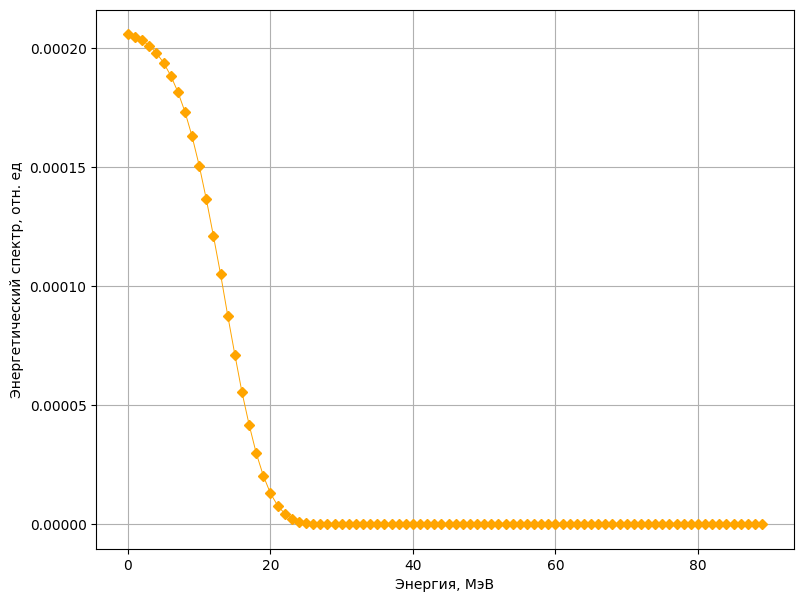

In [21]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(range(90), spectrums_signals[0][0], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Скрипт

In [22]:
SP, DEV = [], []

for j in range(len(brems_e)):
    sp, dev = deconvolution_one_spectrum(brems_e[j], spectrums_signals[j])
    SP.append(sp)
    DEV.append(dev)
    print(f'ВЫПОЛНЕНО {j+1} из {len(brems_e)}')

(0), время: 0.0 секунд
(1), время: 8.87652 секунд
(2), время: 17.81162 секунд
(3), время: 26.47804 секунд
(4), время: 36.905 секунд
(5), время: 45.94898 секунд
(6), время: 54.59213 секунд
(7), время: 63.58772 секунд
(8), время: 72.01063 секунд
(9), время: 80.16721 секунд
(10), время: 87.82718 секунд
(11), время: 96.13992 секунд
(12), время: 104.15222 секунд
(13), время: 112.19361 секунд
(14), время: 120.28065 секунд
(15), время: 128.22235 секунд
(16), время: 136.96325 секунд
(17), время: 145.19746 секунд
(18), время: 152.84635 секунд
(19), время: 161.11896 секунд
(20), время: 169.3347 секунд
(21), время: 176.98526 секунд
(22), время: 184.79593 секунд
(23), время: 192.93171 секунд
(24), время: 201.61518 секунд
(25), время: 210.926 секунд
(26), время: 220.21155 секунд
(27), время: 229.10051 секунд
(28), время: 238.15127 секунд
(29), время: 246.98257 секунд
(30), время: 255.65972 секунд
(31), время: 264.99581 секунд
(32), время: 273.9745 секунд
(33), время: 282.42102 секунд
(34), время: 2

(74), время: 602.1702 секунд
(75), время: 611.22854 секунд
(76), время: 619.68427 секунд
(77), время: 627.55353 секунд
(78), время: 635.78717 секунд
(79), время: 643.28756 секунд
(80), время: 650.82459 секунд
(81), время: 658.46098 секунд
(82), время: 666.6999 секунд
(83), время: 675.02539 секунд
(84), время: 683.92097 секунд
(85), время: 691.8653 секунд
(86), время: 700.52535 секунд
(87), время: 708.88381 секунд
(88), время: 717.98175 секунд
(89), время: 726.16975 секунд
(90), время: 734.89777 секунд
(91), время: 743.5889 секунд
(92), время: 752.0739 секунд
(93), время: 759.86994 секунд
(94), время: 767.74138 секунд
(95), время: 775.43634 секунд
(96), время: 782.97299 секунд
(97), время: 792.10736 секунд
(98), время: 800.73027 секунд
(99), время: 809.52073 секунд
(100), время: 818.48524 секунд
ВЫПОЛНЕНО 3 из 50
(0), время: 0.0 секунд
(1), время: 8.5951 секунд
(2), время: 17.0089 секунд
(3), время: 25.30797 секунд
(4), время: 34.2448 секунд
(5), время: 43.38611 секунд
(6), время: 52.20

(47), время: 400.80278 секунд
(48), время: 409.34769 секунд
(49), время: 417.28474 секунд
(50), время: 425.36024 секунд
(51), время: 434.21127 секунд
(52), время: 443.44116 секунд
(53), время: 452.34267 секунд
(54), время: 461.58719 секунд
(55), время: 470.20861 секунд
(56), время: 478.37634 секунд
(57), время: 486.57499 секунд
(58), время: 495.08174 секунд
(59), время: 502.99406 секунд
(60), время: 511.32452 секунд
(61), время: 521.23835 секунд
(62), время: 530.07711 секунд
(63), время: 539.45747 секунд
(64), время: 548.16088 секунд
(65), время: 557.51368 секунд
(66), время: 567.22632 секунд
(67), время: 576.29767 секунд
(68), время: 585.48818 секунд
(69), время: 594.90217 секунд
(70), время: 604.46113 секунд
(71), время: 614.02185 секунд
(72), время: 622.65338 секунд
(73), время: 631.78525 секунд
(74), время: 640.20949 секунд
(75), время: 648.74657 секунд
(76), время: 657.17785 секунд
(77), время: 665.39785 секунд
(78), время: 674.29616 секунд
(79), время: 683.06442 секунд
(80), врем

(20), время: 170.04298 секунд
(21), время: 177.94888 секунд
(22), время: 186.49049 секунд
(23), время: 195.07854 секунд
(24), время: 203.7964 секунд
(25), время: 213.10286 секунд
(26), время: 221.61955 секунд
(27), время: 230.09046 секунд
(28), время: 238.15452 секунд
(29), время: 247.22046 секунд
(30), время: 255.58644 секунд
(31), время: 264.46916 секунд
(32), время: 272.32948 секунд
(33), время: 280.95064 секунд
(34), время: 290.20952 секунд
(35), время: 298.68332 секунд
(36), время: 307.14612 секунд
(37), время: 316.26695 секунд
(38), время: 325.50758 секунд
(39), время: 334.27502 секунд
(40), время: 343.18056 секунд
(41), время: 352.41045 секунд
(42), время: 361.60865 секунд
(43), время: 370.24552 секунд
(44), время: 378.8337 секунд
(45), время: 387.4921 секунд
(46), время: 395.24502 секунд
(47), время: 403.25684 секунд
(48), время: 412.30166 секунд
(49), время: 421.32077 секунд
(50), время: 429.10979 секунд
(51), время: 438.21256 секунд
(52), время: 447.14398 секунд
(53), время: 

(93), время: 819.1156 секунд
(94), время: 827.50913 секунд
(95), время: 836.1282 секунд
(96), время: 844.06174 секунд
(97), время: 852.41356 секунд
(98), время: 860.29637 секунд
(99), время: 868.33006 секунд
(100), время: 877.05817 секунд
ВЫПОЛНЕНО 11 из 50
(0), время: 0.0 секунд
(1), время: 8.3813 секунд
(2), время: 17.08 секунд
(3), время: 25.72593 секунд
(4), время: 34.11913 секунд
(5), время: 42.32657 секунд
(6), время: 51.00761 секунд
(7), время: 59.94347 секунд
(8), время: 68.43546 секунд
(9), время: 75.56522 секунд
(10), время: 83.81016 секунд
(11), время: 92.30208 секунд
(12), время: 100.12652 секунд
(13), время: 108.55771 секунд
(14), время: 116.49976 секунд
(15), время: 124.68295 секунд
(16), время: 133.19441 секунд
(17), время: 142.27004 секунд
(18), время: 151.00299 секунд
(19), время: 159.17839 секунд
(20), время: 167.16587 секунд
(21), время: 175.4511 секунд
(22), время: 184.40995 секунд
(23), время: 193.24999 секунд
(24), время: 201.98032 секунд
(25), время: 210.9691 сек

(66), время: 582.51278 секунд
(67), время: 591.66535 секунд
(68), время: 601.12193 секунд
(69), время: 610.87523 секунд
(70), время: 620.92938 секунд
(71), время: 630.48658 секунд
(72), время: 639.76545 секунд
(73), время: 649.05125 секунд
(74), время: 657.1406 секунд
(75), время: 665.87363 секунд
(76), время: 674.51824 секунд
(77), время: 683.2779 секунд
(78), время: 691.41586 секунд
(79), время: 699.85092 секунд
(80), время: 708.80518 секунд
(81), время: 717.80812 секунд
(82), время: 726.10482 секунд
(83), время: 733.35355 секунд
(84), время: 741.42974 секунд
(85), время: 749.94395 секунд
(86), время: 758.13539 секунд
(87), время: 766.65584 секунд
(88), время: 775.52384 секунд
(89), время: 783.25796 секунд
(90), время: 792.64477 секунд
(91), время: 800.73318 секунд
(92), время: 808.78326 секунд
(93), время: 816.40579 секунд
(94), время: 824.66955 секунд
(95), время: 833.30226 секунд
(96), время: 842.06875 секунд
(97), время: 850.79894 секунд
(98), время: 858.85613 секунд
(99), время:

(38), время: 327.30125 секунд
(39), время: 335.96514 секунд
(40), время: 344.5123 секунд
(41), время: 353.51616 секунд
(42), время: 361.77094 секунд
(43), время: 369.80618 секунд
(44), время: 378.33849 секунд
(45), время: 388.03191 секунд
(46), время: 397.19004 секунд
(47), время: 406.29005 секунд
(48), время: 414.99405 секунд
(49), время: 423.75906 секунд
(50), время: 431.96458 секунд
(51), время: 440.30243 секунд
(52), время: 449.58671 секунд
(53), время: 459.03044 секунд
(54), время: 468.03341 секунд
(55), время: 477.33372 секунд
(56), время: 486.96356 секунд
(57), время: 495.91511 секунд
(58), время: 505.29184 секунд
(59), время: 514.39175 секунд
(60), время: 523.92335 секунд
(61), время: 532.28225 секунд
(62), время: 540.98798 секунд
(63), время: 549.40323 секунд
(64), время: 558.58164 секунд
(65), время: 567.62232 секунд
(66), время: 576.50881 секунд
(67), время: 585.73588 секунд
(68), время: 594.93729 секунд
(69), время: 602.89841 секунд
(70), время: 611.2229 секунд
(71), время:

(10), время: 85.12497 секунд
(11), время: 93.46409 секунд
(12), время: 101.91575 секунд
(13), время: 109.93397 секунд
(14), время: 118.7021 секунд
(15), время: 127.27103 секунд
(16), время: 135.87572 секунд
(17), время: 144.41239 секунд
(18), время: 153.26883 секунд
(19), время: 162.01491 секунд
(20), время: 170.91598 секунд
(21), время: 180.29865 секунд
(22), время: 188.83276 секунд
(23), время: 198.09477 секунд
(24), время: 206.86575 секунд
(25), время: 216.50784 секунд
(26), время: 225.80945 секунд
(27), время: 235.17393 секунд
(28), время: 243.73048 секунд
(29), время: 252.17661 секунд
(30), время: 260.83199 секунд
(31), время: 269.58274 секунд
(32), время: 278.04945 секунд
(33), время: 287.77497 секунд
(34), время: 296.93242 секунд
(35), время: 305.82158 секунд
(36), время: 314.76264 секунд
(37), время: 323.73931 секунд
(38), время: 332.62478 секунд
(39), время: 340.94635 секунд
(40), время: 349.2614 секунд
(41), время: 357.9012 секунд
(42), время: 365.81455 секунд
(43), время: 37

(83), время: 723.27288 секунд
(84), время: 732.00567 секунд
(85), время: 740.67931 секунд
(86), время: 749.31853 секунд
(87), время: 758.29505 секунд
(88), время: 767.17997 секунд
(89), время: 775.69438 секунд
(90), время: 783.79822 секунд
(91), время: 792.97793 секунд
(92), время: 801.93024 секунд
(93), время: 810.86787 секунд
(94), время: 819.47917 секунд
(95), время: 827.49386 секунд
(96), время: 835.54229 секунд
(97), время: 844.19694 секунд
(98), время: 852.81779 секунд
(99), время: 861.58623 секунд
(100), время: 869.70436 секунд
ВЫПОЛНЕНО 22 из 50
(0), время: 0.0 секунд
(1), время: 8.92948 секунд
(2), время: 18.1615 секунд
(3), время: 27.08727 секунд
(4), время: 35.94912 секунд
(5), время: 45.17815 секунд
(6), время: 54.21519 секунд
(7), время: 62.90654 секунд
(8), время: 71.28647 секунд
(9), время: 79.40831 секунд
(10), время: 87.87687 секунд
(11), время: 96.31386 секунд
(12), время: 104.80631 секунд
(13), время: 113.092 секунд
(14), время: 122.08977 секунд
(15), время: 129.8697

(55), время: 480.42606 секунд
(56), время: 488.68827 секунд
(57), время: 497.72761 секунд
(58), время: 506.30145 секунд
(59), время: 514.63816 секунд
(60), время: 522.1517 секунд
(61), время: 530.84119 секунд
(62), время: 539.39328 секунд
(63), время: 548.47436 секунд
(64), время: 557.33556 секунд
(65), время: 565.58562 секунд
(66), время: 574.08917 секунд
(67), время: 583.11466 секунд
(68), время: 592.1703 секунд
(69), время: 601.35466 секунд
(70), время: 611.07832 секунд
(71), время: 621.01756 секунд
(72), время: 631.25663 секунд
(73), время: 641.48057 секунд
(74), время: 651.00486 секунд
(75), время: 660.11396 секунд
(76), время: 668.53108 секунд
(77), время: 677.06137 секунд
(78), время: 685.88235 секунд
(79), время: 693.90931 секунд
(80), время: 702.24586 секунд
(81), время: 709.66746 секунд
(82), время: 718.58214 секунд
(83), время: 726.82262 секунд
(84), время: 735.00867 секунд
(85), время: 742.74508 секунд
(86), время: 751.40662 секунд
(87), время: 759.58895 секунд
(88), время:

(27), время: 232.5476 секунд
(28), время: 241.60428 секунд
(29), время: 250.79762 секунд
(30), время: 259.39398 секунд
(31), время: 268.20097 секунд
(32), время: 277.5566 секунд
(33), время: 287.01752 секунд
(34), время: 295.52421 секунд
(35), время: 304.91175 секунд
(36), время: 314.05843 секунд
(37), время: 323.11764 секунд
(38), время: 333.24177 секунд
(39), время: 342.27776 секунд
(40), время: 351.04268 секунд
(41), время: 359.48341 секунд
(42), время: 367.85847 секунд
(43), время: 376.11965 секунд
(44), время: 385.49918 секунд
(45), время: 394.51344 секунд
(46), время: 402.87598 секунд
(47), время: 412.05384 секунд
(48), время: 420.77231 секунд
(49), время: 429.16016 секунд
(50), время: 437.04527 секунд
(51), время: 445.95134 секунд
(52), время: 454.66009 секунд
(53), время: 463.44106 секунд
(54), время: 472.04287 секунд
(55), время: 480.18188 секунд
(56), время: 489.25225 секунд
(57), время: 497.70601 секунд
(58), время: 507.04682 секунд
(59), время: 515.84405 секунд
(60), время:

(100), время: 886.99855 секунд
ВЫПОЛНЕНО 30 из 50
(0), время: 0.0 секунд
(1), время: 8.74958 секунд
(2), время: 17.5816 секунд
(3), время: 26.61002 секунд
(4), время: 35.58297 секунд
(5), время: 43.99264 секунд
(6), время: 53.53246 секунд
(7), время: 62.60012 секунд
(8), время: 71.51549 секунд
(9), время: 79.2345 секунд
(10), время: 87.46156 секунд
(11), время: 95.02454 секунд
(12), время: 103.39907 секунд
(13), время: 111.86762 секунд
(14), время: 120.90839 секунд
(15), время: 129.77732 секунд
(16), время: 138.80071 секунд
(17), время: 147.45066 секунд
(18), время: 155.30639 секунд
(19), время: 162.77352 секунд
(20), время: 170.29841 секунд
(21), время: 179.15596 секунд
(22), время: 187.40967 секунд
(23), время: 195.78472 секунд
(24), время: 205.02414 секунд
(25), время: 213.93674 секунд
(26), время: 223.22109 секунд
(27), время: 231.47747 секунд
(28), время: 240.26658 секунд
(29), время: 249.33183 секунд
(30), время: 257.62758 секунд
(31), время: 266.35566 секунд
(32), время: 275.684

(72), время: 622.82273 секунд
(73), время: 631.59451 секунд
(74), время: 639.55496 секунд
(75), время: 647.15313 секунд
(76), время: 656.30292 секунд
(77), время: 664.65351 секунд
(78), время: 672.99757 секунд
(79), время: 681.35397 секунд
(80), время: 690.53603 секунд
(81), время: 698.4763 секунд
(82), время: 706.8753 секунд
(83), время: 714.80802 секунд
(84), время: 723.51407 секунд
(85), время: 731.93263 секунд
(86), время: 739.90566 секунд
(87), время: 748.60522 секунд
(88), время: 757.67929 секунд
(89), время: 766.74112 секунд
(90), время: 774.60058 секунд
(91), время: 784.00047 секунд
(92), время: 794.04558 секунд
(93), время: 801.81734 секунд
(94), время: 810.95608 секунд
(95), время: 820.10538 секунд
(96), время: 828.12712 секунд
(97), время: 836.05333 секунд
(98), время: 844.27303 секунд
(99), время: 853.48106 секунд
(100), время: 861.28701 секунд
ВЫПОЛНЕНО 33 из 50
(0), время: 0.0 секунд
(1), время: 8.43991 секунд
(2), время: 16.59483 секунд
(3), время: 24.82123 секунд
(4), в

(44), время: 386.35536 секунд
(45), время: 395.58053 секунд
(46), время: 404.75638 секунд
(47), время: 412.93622 секунд
(48), время: 422.27915 секунд
(49), время: 430.74174 секунд
(50), время: 439.06196 секунд
(51), время: 447.13274 секунд
(52), время: 456.66669 секунд
(53), время: 466.17552 секунд
(54), время: 475.8658 секунд
(55), время: 484.19757 секунд
(56), время: 492.79968 секунд
(57), время: 501.77767 секунд
(58), время: 510.62752 секунд
(59), время: 519.41816 секунд
(60), время: 528.11818 секунд
(61), время: 538.18691 секунд
(62), время: 548.79815 секунд
(63), время: 558.53726 секунд
(64), время: 566.69152 секунд
(65), время: 575.99485 секунд
(66), время: 585.60714 секунд
(67), время: 594.5692 секунд
(68), время: 604.2136 секунд
(69), время: 614.06794 секунд
(70), время: 622.66744 секунд
(71), время: 631.68521 секунд
(72), время: 640.20591 секунд
(73), время: 648.68581 секунд
(74), время: 658.17807 секунд
(75), время: 666.92303 секунд
(76), время: 676.18959 секунд
(77), время: 

(16), время: 140.61582 секунд
(17), время: 149.02421 секунд
(18), время: 156.6379 секунд
(19), время: 165.60516 секунд
(20), время: 174.60305 секунд
(21), время: 183.91202 секунд
(22), время: 191.92418 секунд
(23), время: 200.66137 секунд
(24), время: 209.08727 секунд
(25), время: 217.89012 секунд
(26), время: 226.73266 секунд
(27), время: 235.92898 секунд
(28), время: 245.49189 секунд
(29), время: 253.71815 секунд
(30), время: 262.04386 секунд
(31), время: 270.51241 секунд
(32), время: 279.73696 секунд
(33), время: 288.47209 секунд
(34), время: 297.03397 секунд
(35), время: 305.85372 секунд
(36), время: 313.80862 секунд
(37), время: 322.19652 секунд
(38), время: 329.97626 секунд
(39), время: 338.87504 секунд
(40), время: 348.11129 секунд
(41), время: 356.88997 секунд
(42), время: 366.07285 секунд
(43), время: 375.56938 секунд
(44), время: 385.15557 секунд
(45), время: 394.13513 секунд
(46), время: 402.77809 секунд
(47), время: 411.94628 секунд
(48), время: 420.55102 секунд
(49), время

(89), время: 778.23668 секунд
(90), время: 786.17745 секунд
(91), время: 794.39081 секунд
(92), время: 802.22455 секунд
(93), время: 810.46659 секунд
(94), время: 818.38462 секунд
(95), время: 826.81056 секунд
(96), время: 835.00045 секунд
(97), время: 843.51856 секунд
(98), время: 852.12357 секунд
(99), время: 861.50536 секунд
(100), время: 870.33174 секунд
ВЫПОЛНЕНО 41 из 50
(0), время: 0.0 секунд
(1), время: 9.21005 секунд
(2), время: 18.58499 секунд
(3), время: 27.28349 секунд
(4), время: 36.26059 секунд
(5), время: 46.17993 секунд
(6), время: 56.46321 секунд
(7), время: 64.89791 секунд
(8), время: 73.39979 секунд
(9), время: 82.41903 секунд
(10), время: 91.54415 секунд
(11), время: 99.61854 секунд
(12), время: 108.17614 секунд
(13), время: 117.36275 секунд
(14), время: 125.17541 секунд
(15), время: 133.18703 секунд
(16), время: 141.71494 секунд
(17), время: 151.10484 секунд
(18), время: 159.41836 секунд
(19), время: 167.66439 секунд
(20), время: 176.72383 секунд
(21), время: 186.4

(62), время: 547.60588 секунд
(63), время: 557.70773 секунд
(64), время: 567.10467 секунд
(65), время: 576.18479 секунд
(66), время: 584.93203 секунд
(67), время: 593.39719 секунд
(68), время: 602.54662 секунд
(69), время: 611.90218 секунд
(70), время: 621.00168 секунд
(71), время: 629.0143 секунд
(72), время: 638.88703 секунд
(73), время: 648.04898 секунд
(74), время: 656.65056 секунд
(75), время: 665.78543 секунд
(76), время: 674.49846 секунд
(77), время: 682.89382 секунд
(78), время: 691.59726 секунд
(79), время: 700.83699 секунд
(80), время: 709.34862 секунд
(81), время: 717.90569 секунд
(82), время: 726.54386 секунд
(83), время: 736.08004 секунд
(84), время: 744.72311 секунд
(85), время: 753.15148 секунд
(86), время: 762.00665 секунд
(87), время: 771.31277 секунд
(88), время: 779.56756 секунд
(89), время: 788.4537 секунд
(90), время: 797.279 секунд
(91), время: 804.89766 секунд
(92), время: 812.36409 секунд
(93), время: 820.55457 секунд
(94), время: 829.13737 секунд
(95), время: 8

(34), время: 289.66466 секунд
(35), время: 297.82457 секунд
(36), время: 306.92937 секунд
(37), время: 315.72464 секунд
(38), время: 324.47233 секунд
(39), время: 333.16928 секунд
(40), время: 341.83455 секунд
(41), время: 349.82322 секунд
(42), время: 358.70414 секунд
(43), время: 366.91096 секунд
(44), время: 374.93187 секунд
(45), время: 383.93679 секунд
(46), время: 392.70793 секунд
(47), время: 400.70583 секунд
(48), время: 409.24529 секунд
(49), время: 417.91894 секунд
(50), время: 426.97044 секунд
(51), время: 436.60591 секунд
(52), время: 445.11232 секунд
(53), время: 453.8019 секунд
(54), время: 463.37884 секунд
(55), время: 471.84343 секунд
(56), время: 480.76273 секунд
(57), время: 489.41162 секунд
(58), время: 498.00316 секунд
(59), время: 507.45774 секунд
(60), время: 516.97504 секунд
(61), время: 526.36446 секунд
(62), время: 535.45026 секунд
(63), время: 543.75018 секунд
(64), время: 552.66992 секунд
(65), время: 562.29236 секунд
(66), время: 571.1109 секунд
(67), время:

(6), время: 51.00624 секунд
(7), время: 58.48597 секунд
(8), время: 67.79579 секунд
(9), время: 75.88877 секунд
(10), время: 85.35496 секунд
(11), время: 94.14735 секунд
(12), время: 102.16317 секунд
(13), время: 110.45441 секунд
(14), время: 118.74881 секунд
(15), время: 127.17314 секунд
(16), время: 135.64489 секунд
(17), время: 144.89181 секунд
(18), время: 152.89499 секунд
(19), время: 160.23086 секунд
(20), время: 168.22957 секунд
(21), время: 175.58086 секунд
(22), время: 183.31964 секунд
(23), время: 191.63368 секунд
(24), время: 199.63414 секунд
(25), время: 208.0834 секунд
(26), время: 217.10742 секунд
(27), время: 225.64137 секунд
(28), время: 234.28122 секунд
(29), время: 242.86575 секунд
(30), время: 250.92704 секунд
(31), время: 259.91192 секунд
(32), время: 268.97894 секунд
(33), время: 277.41184 секунд
(34), время: 285.56525 секунд
(35), время: 295.20457 секунд
(36), время: 306.08997 секунд
(37), время: 314.73589 секунд
(38), время: 323.57879 секунд
(39), время: 332.6552

Сохранение данных

In [23]:
np.save(f'K_{m}_SP.npy', SP)
np.save(f'K_{m}_DEV.npy', DEV)

Загрузка данных

Построение

In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
D = np.array(DEV)
X,Y = np.meshgrid(edge_max_values, beams_energyes)
X, Ylog = np.meshgrid(edge_max_values, np.log10(beams_energyes))
Xlog, Ylog = np.meshgrid(np.log10(edge_max_values), np.log10(beams_energyes))

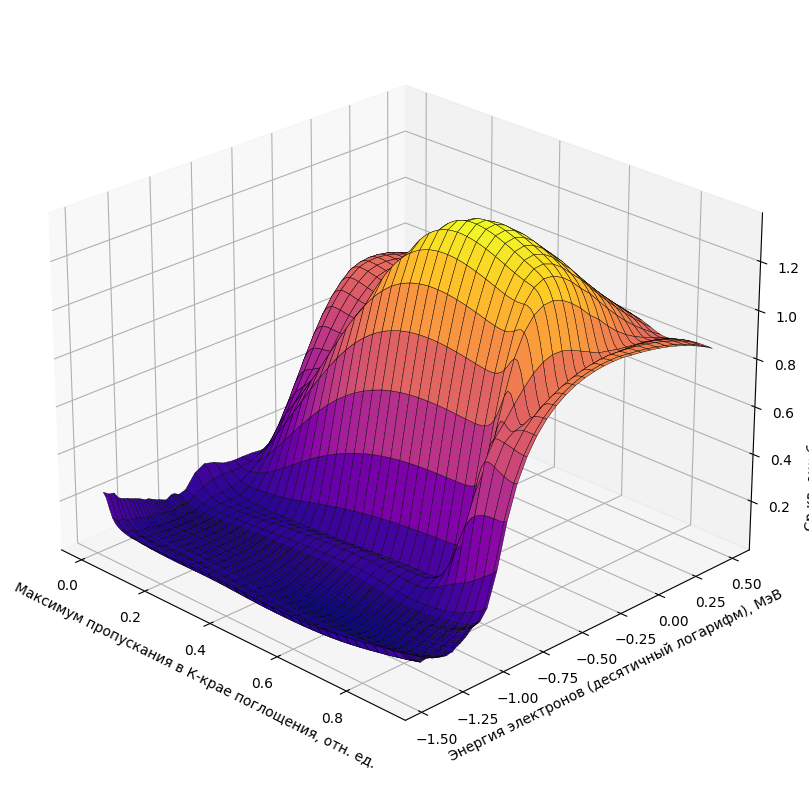

In [26]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': '3d'})
ax.plot_surface(X, Ylog, D, cmap='plasma', linewidth=0.3, edgecolors='k', shade=True)

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов (десятичный логарифм), МэВ')
ax.set_zlabel('Ср.кв. ошибка восстановления, отн. ед.')
fig.tight_layout()

# угол зрения (линейный)
# ax.view_init(elev=20, azim=-135)

# угол зрения (логарифм)
ax.view_init(elev=25, azim=-45)

# fig.savefig('К_фильтры_3D.jpg', bbox_inches='tight')

Контурная карта

In [27]:
linspace4 = np.geomspace(1e-2, 0.3, 20)
linspace5 = np.linspace(0.31, 1.4, 10)

In [28]:
c_map_levels = []
c_map_levels.extend(linspace4)
c_map_levels.extend(linspace5)

Text(0, 0.5, 'Энергия электронов, МэВ')

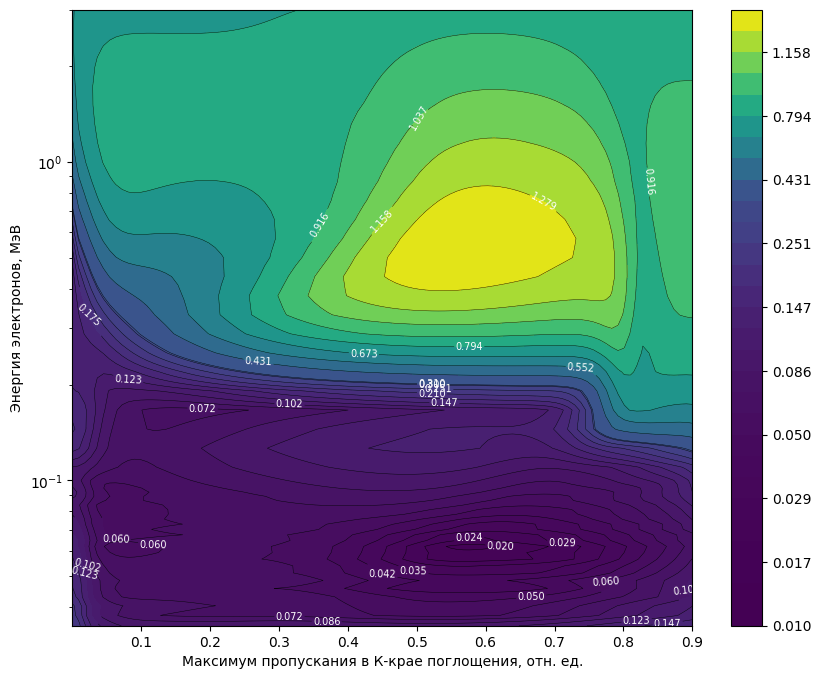

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

c_map = ax.contourf(X, Y, D, levels=c_map_levels)
borders = ax.contour(X, Y, D, colors='k', levels=c_map_levels, linewidths=0.3)
ax.clabel(borders, fontsize=7, colors='w')
fig.colorbar(c_map)
ax.set_yscale('log')

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов, МэВ')

# fig.savefig('К_фильтры_контурная_карта.jpg', bbox_inches='tight')

Зависимость минимальной ошибки восстановления от граничной энерии спектра

In [30]:
minimal_deviations = []

for i,val in enumerate(beams_energyes):
    min_value = min(DEV[i])
    minimal_deviations.append(min_value)

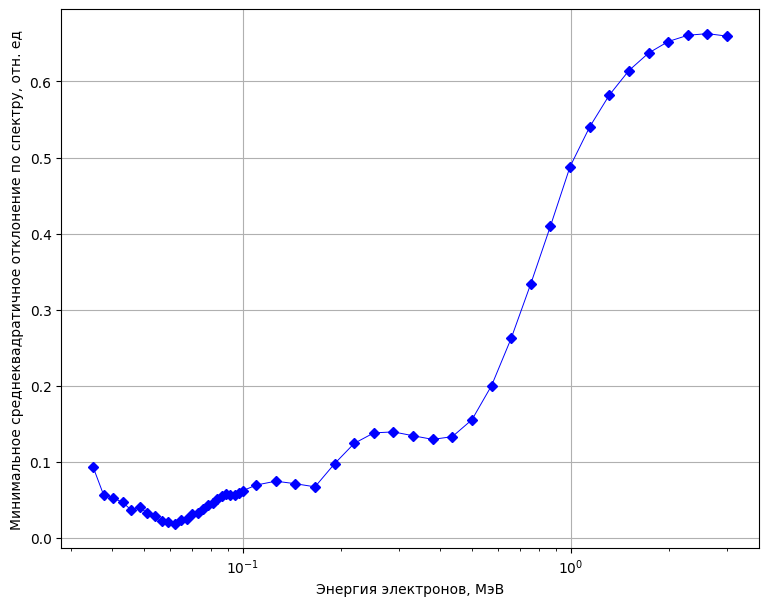

In [31]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, minimal_deviations, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Минимальное среднеквадратичное отклонение по спектру, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('К_фильтры_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')

In [32]:
np.save(f'K_{m}_MIN.npy', minimal_deviations)